What are the indicators of depression, anxiety or stress among the respondents?


In [1]:
#Download Libraries
import pandas as pd
import numpy as np
import matplotlib as plt
from scipy.stats import ttest_rel
from scipy.stats import chi2_contingency 
import statsmodels.stats.multicomp as mc
import scipy.stats as stats

In [2]:
# Read file using pandas
df = pd.read_csv('modified_dataset.csv')
df

,Q1A,Q1I,Q2A,Q2I,Q3A,Q3I,Q4A,Q4I,Q5A,Q5I,...,voted,married,familysize,major,depression_scores,anxiety_scores,stress_scores,depression_status,anxiety_status,stress_status
0,4,28,4,25,2,16,4,8,4,34,...,2,1,2,Unknown,41,48,54,Extremely Severe,Extremely Severe,Extremely Severe
1,4,2,1,36,2,35,3,28,4,10,...,2,1,4,Unknown,38,31,41,Extremely Severe,Extremely Severe,Extremely Severe
2,3,7,1,33,4,41,1,13,4,11,...,1,1,3,Unknown,53,26,31,Extremely Severe,Extremely Severe,Severe
3,2,23,3,11,2,37,1,27,3,28,...,2,1,5,biology,30,31,30,Extremely Severe,Extremely Severe,Severe
4,2,36,2,13,3,5,4,10,4,2,...,2,1,4,Psychology,46,54,43,Extremely Severe,Extremely Severe,Extremely Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,31,1,5,3,29,2,37,3,39,...,2,1,2,Unknown,50,26,29,Extremely Severe,Extremely Severe,Severe
39771,3,14,4,41,3,15,4,33,3,17,...,2,1,4,Mathematic,52,48,48,Extremely Severe,Extremely Severe,Extremely Severe
39772,2,1,1,4,2,14,1,27,1,6,...,1,2,3,Computer Science,18,15,19,Moderate,Severe,Moderate
39773,3,36,1,34,2,10,2,20,3,9,...,1,1,2,History,30,27,47,Extremely Severe,Extremely Severe,Extremely Severe


A few of them are numerical such as: age and family size. We will use ANOVA Test for these variables.The rest is categorical. For categorical, we will use Chi Square Test.

Depression

In [3]:
#Depression and education
info = pd.crosstab(index=df['depression_status'], columns=df['education'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Depression and Education NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Depression and Education are independent of each other.'
  )

chi2 value:  733.4069417820731
p value:  4.582027470758336e-153
dof value:  8
Depression and Education NOT independent of each other. There are relationships between these categorical variables.


In [4]:
#Depression and urban
info = pd.crosstab(index=df['depression_status'], columns=df['urban'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Depression and Urban are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Depression and Urban are independent of each other.'
  )

chi2 value:  23.546641090985023
p value:  0.0006326203576353957
dof value:  6
Depression and Urban are NOT independent of each other. There are relationships between these categorical variables.


In [5]:
#Depression and gender
info = pd.crosstab(index=df['depression_status'], columns=df['gender'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Depression and gender are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Depression and gender are independent of each other.'
  )

chi2 value:  151.11162404519555
p value:  4.503272186122182e-30
dof value:  6
Depression and gender are NOT independent of each other. There are relationships between these categorical variables.


In [6]:
#Depression and engnat
info = pd.crosstab(index=df['depression_status'], columns=df['engnat'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Depression and engnat are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Depression and engnat are independent of each other'
  )

chi2 value:  31.653973392043397
p value:  2.2512999625360503e-06
dof value:  4
Depression and engnat are NOT independent of each other. There are relationships between these categorical variables.


In [7]:
#Depression and age
#https://www.pythonfordatascience.org/anova-python/
F,p =stats.f_oneway(df['age'][df['depression_status'] == 'Extremely Severe'],
               df['age'][df['depression_status'] == 'Severe'],
               df['age'][df['depression_status'] == 'Moderate'])
print('F :', F)
print('p value:', p)
if p < 0.05:
  print(
      'Depression and age has significant difference between the groups.'
  )
else:
    print(
      'Depression and age has NO significant difference between the groups.'
  )

F : 61.40216947976065
p value: 2.368434869860284e-27
Depression and age has significant difference between the groups.


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
     group1       group2  meandiff p-adj  lower   upper  reject
---------------------------------------------------------------
Extremely Severe Moderate   3.2777 0.001  2.5607  3.9946   True
Extremely Severe   Severe   1.4225 0.001   0.728   2.117   True
        Moderate   Severe  -1.8552 0.001 -2.7543 -0.9561   True
---------------------------------------------------------------
There is a statistically significant difference in age between depression status of all groups. 
Figure(720x432)
The age group around the age of 24 to 25 is the most severe for depression status.


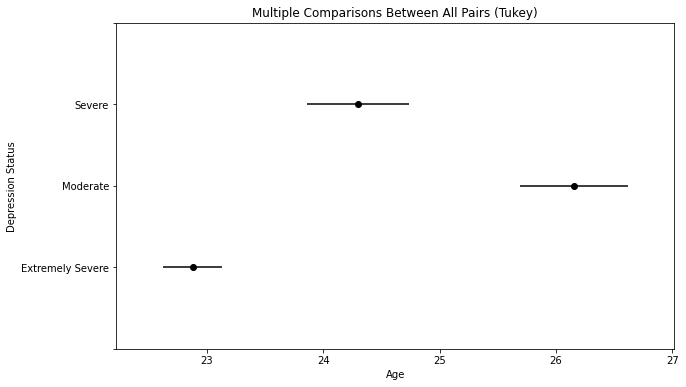

In [8]:
#post hoc
comp = mc.MultiComparison(df['age'], df['depression_status'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())
print("There is a statistically significant difference in age between depression status of all groups. ")
print(post_hoc_res.plot_simultaneous(ylabel= "Depression Status", xlabel= "Age"))
print("The age group around the age of 24 to 25 is the most severe for depression status.")

In [9]:
#Depression and screensize
info = pd.crosstab(index=df['depression_status'], columns=df['screensize'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Depression and screensize are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Depression and screensize are independent of each other.'
  )

chi2 value:  44.03308244032163
p value:  2.743706407477002e-10
dof value:  2
Depression and screensize are NOT independent of each other. There are relationships between these categorical variables.


In [10]:
#Depression and uniquenetworklocation
info = pd.crosstab(index=df['depression_status'], columns=df['uniquenetworklocation'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Depression and uniquenetworklocation are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Depression and uniquenetworklocation are independent of each other'
  )

chi2 value:  44.37096715849386
p value:  2.3172180521084596e-10
dof value:  2
Depression and uniquenetworklocation are NOT independent of each other. There are relationships between these categorical variables.


In [11]:
#Depression and hand
info = pd.crosstab(index=df['depression_status'], columns=df['hand'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Depression and hand are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Depression and hand are independent of each other.'
  )

chi2 value:  24.742691662584903
p value:  0.00038100904681232666
dof value:  6
Depression and hand are NOT independent of each other. There are relationships between these categorical variables.


In [12]:
#Depression and religion
info = pd.crosstab(index=df['depression_status'], columns=df['religion'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Depression and religion are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Depression and religion are independent of each other.'
  )

chi2 value:  277.1924305897115
p value:  6.341076021622195e-45
dof value:  24
Depression and religion are NOT independent of each other. There are relationships between these categorical variables.


In [13]:
#Depression and orientation
info = pd.crosstab(index=df['depression_status'], columns=df['orientation'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Depression and orientation are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Depression and orientation are independent of each other.'
  )

chi2 value:  417.64672293292233
p value:  1.6460010334473368e-83
dof value:  10
Depression and orientation are NOT independent of each other. There are relationships between these categorical variables.


In [14]:
#Depression and race
info = pd.crosstab(index=df['depression_status'], columns=df['race'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Depression and race are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Depression and race are independent of each other.'
  )

chi2 value:  98.28834900721705
p value:  1.2041286978242113e-15
dof value:  12
Depression and race are NOT independent of each other. There are relationships between these categorical variables.


In [15]:
#Depression and voted
info = pd.crosstab(index=df['depression_status'], columns=df['voted'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Depression and voted are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Depression and voted are independent of each other.'
  )

chi2 value:  333.36608993933606
p value:  6.83852587656601e-71
dof value:  4
Depression and voted are NOT independent of each other. There are relationships between these categorical variables.


In [16]:
#Depression and married
info = pd.crosstab(index=df['depression_status'], columns=df['married'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Depression and married are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Depression and married are independent of each other.'
  )

chi2 value:  720.5713503737193
p value:  2.211027650468862e-152
dof value:  6
Depression and married are NOT independent of each other. There are relationships between these categorical variables.


In [17]:
#Depression and family size
F,p =stats.f_oneway(df['familysize'][df['depression_status'] == 'Extremely Severe'],
               df['familysize'][df['depression_status'] == 'Severe'],
               df['familysize'][df['depression_status'] == 'Moderate'])
print('F :', F)
print('p value:', p)
if p < 0.05:
  print(
      'Depression and family size has significant difference between the groups.'
  )
else:
    print(
      'Depression and family size has NO significant difference between the groups.'
  )

F : 28.448987754225577
p value: 4.5039224954453383e-13
Depression and family size has significant difference between the groups.


     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
     group1       group2  meandiff p-adj  lower  upper  reject
--------------------------------------------------------------
Extremely Severe Moderate   0.1685 0.001  0.0973 0.2397   True
Extremely Severe   Severe   0.1785 0.001  0.1096 0.2475   True
        Moderate   Severe     0.01   0.9 -0.0793 0.0993  False
--------------------------------------------------------------
There is a statistically significant difference in family size between those who depression status are severe and extremely severe, and depression status are moderate and extremely severe, no other groups differed significantly. 
Figure(720x432)


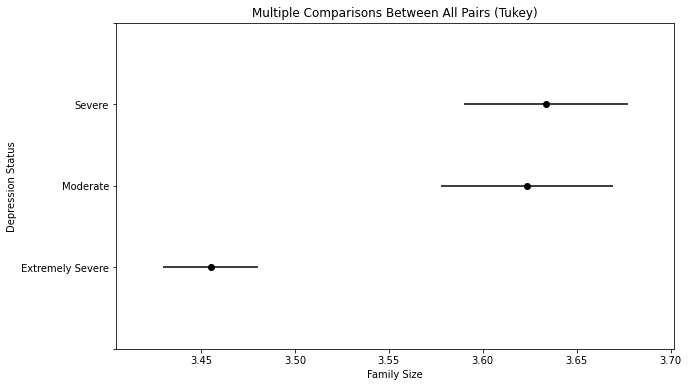

In [18]:
#post hoc
comp = mc.MultiComparison(df['familysize'], df['depression_status'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())
print("There is a statistically significant difference in family size between those who depression status are severe and extremely severe, and depression status are moderate and extremely severe, no other groups differed significantly. ")
print(post_hoc_res.plot_simultaneous(ylabel= "Depression Status", xlabel= "Family Size"))

In [19]:
#Depression and major
info = pd.crosstab(index=df['depression_status'], columns=df['major'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Depression and major are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Depression and major are independent of each other'
  )

chi2 value:  11941.191323365563
p value:  1.104605642970993e-18
dof value:  10616
Depression and major are NOT independent of each other. There are relationships between these categorical variables.


Anxiety


In [20]:
#Anxiety and education
info = pd.crosstab(index=df['anxiety_status'], columns=df['education'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Anxiety and Education are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Anxiety and Education are independent of each other.'
  )

chi2 value:  640.3353025252006
p value:  4.9546452712756546e-133
dof value:  8
Anxiety and Education are NOT independent of each other. There are relationships between these categorical variables.


In [21]:
#Anxiety and urban
info = pd.crosstab(index=df['anxiety_status'], columns=df['urban'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Anxiety and Urban are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Anxiety and Urban are independent of each other.'
  )

chi2 value:  33.58539065517674
p value:  8.088132201879936e-06
dof value:  6
Anxiety and Urban are NOT independent of each other. There are relationships between these categorical variables.


In [22]:
#Anxiety and gender
info = pd.crosstab(index=df['anxiety_status'], columns=df['gender'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Anxiety and gender are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Anxiety and gender are independent of each other.'
  )

chi2 value:  575.1493386071479
p value:  5.33825873123868e-121
dof value:  6
Anxiety and gender are NOT independent of each other. There are relationships between these categorical variables.


In [23]:
#Anxiety and engnat
info = pd.crosstab(index=df['anxiety_status'], columns=df['engnat'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Anxiety and engnat are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Anxiety and engnat are independent of each other.'
  )

chi2 value:  91.2529424838539
p value:  7.13358531460184e-19
dof value:  4
Anxiety and engnat are NOT independent of each other. There are relationships between these categorical variables.


In [24]:
#Anxiety and age
F,p = stats.f_oneway(df['age'][df['anxiety_status'] == 'Extremely Severe'],
               df['age'][df['anxiety_status'] == 'Severe'],
               df['age'][df['anxiety_status'] == 'Moderate'])
print('F :', F)
print('p value:', p)
if p < 0.05:
  print(
      'Anxiety and age has significant difference between the groups.'
  )
else:
    print(
      'Anxiety and age has NO significant difference between the groups.'
  )

F : 182.62778138442653
p value: 1.1162160404643314e-79
Anxiety and age has significant difference between the groups.


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
     group1       group2  meandiff p-adj  lower   upper  reject
---------------------------------------------------------------
Extremely Severe Moderate   8.1602 0.001  6.4717  9.8488   True
Extremely Severe   Severe   4.8615 0.001  4.1534  5.5696   True
        Moderate   Severe  -3.2988 0.001 -5.0872 -1.5104   True
---------------------------------------------------------------
There is a statistically significant difference in age between anxiety status of all groups. 
Figure(720x432)
The age group around the age of 22 to 23 is the most severe for anxiety status.


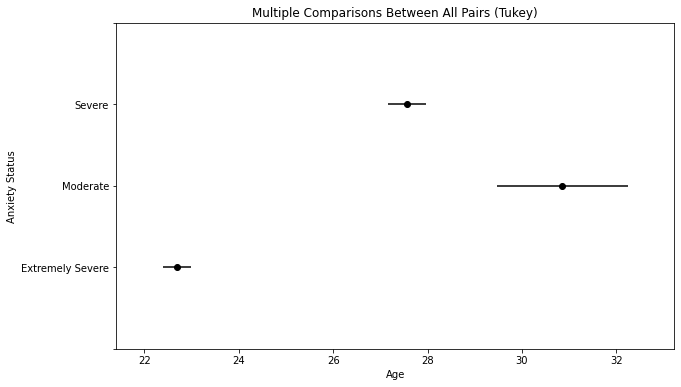

In [25]:
#post hoc
comp = mc.MultiComparison(df['age'], df['anxiety_status'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())
print("There is a statistically significant difference in age between anxiety status of all groups. ")
print(post_hoc_res.plot_simultaneous(ylabel= "Anxiety Status", xlabel= "Age"))
print("The age group around the age of 22 to 23 is the most severe for anxiety status.")

In [26]:
#Anxiety and screensize
info = pd.crosstab(index=df['anxiety_status'], columns=df['screensize'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Anxiety and screen size are NOT independent of each other.There are relationships between these categorical variables.'
  )
else:
    print(
      'Anxiety and screen size are independent of each other.'
  )

chi2 value:  427.75489513579384
p value:  1.3007825963723119e-93
dof value:  2
Anxiety and screen size are NOT independent of each other.There are relationships between these categorical variables.


In [27]:
#Anxiety and uniquenetworklocation
info = pd.crosstab(index=df['anxiety_status'], columns=df['uniquenetworklocation'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Anxiety and unique network location are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Anxiety and unique network location are independent of each other.'
  )

chi2 value:  35.00134596507881
p value:  2.509309865650826e-08
dof value:  2
Anxiety and unique network location are NOT independent of each other. There are relationships between these categorical variables.


In [28]:
###Anxiety and hand######
###Effected#####
info = pd.crosstab(index=df['anxiety_status'], columns=df['hand'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Anxiety and hand are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Anxiety and hand are independent of each other.'
  )


chi2 value:  10.965077690965012
p value:  0.0894617636369601
dof value:  6
Anxiety and hand are independent of each other.


In [29]:
#Anxiety and religion
info = pd.crosstab(index=df['anxiety_status'], columns=df['religion'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Anxiety and religion are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Anxiety and religion are independent of each other.'
  )

chi2 value:  362.37280626757723
p value:  3.775797571268239e-62
dof value:  24
Anxiety and religion are NOT independent of each other. There are relationships between these categorical variables.


In [30]:
#Anxiety and orientation
info = pd.crosstab(index=df['anxiety_status'], columns=df['orientation'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Anxiety and orientation are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Anxiety and orientation are independent of each other.'
  )

chi2 value:  439.4308581701877
p value:  3.7495133383015107e-88
dof value:  10
Anxiety and orientation are NOT independent of each other. There are relationships between these categorical variables.


In [31]:
#Anxiety and race
info = pd.crosstab(index=df['anxiety_status'], columns=df['race'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Anxiety and race are NOT independent of each other. There are relationships between these categorical variables. '
  )
else:
    print(
      'Anxiety and race are independent of each other.'
  )

chi2 value:  270.1457637277109
p value:  8.482178588706789e-51
dof value:  12
Anxiety and race are NOT independent of each other. There are relationships between these categorical variables. 


In [32]:
#Anxiety and voted
info = pd.crosstab(index=df['anxiety_status'], columns=df['voted'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Anxiety and voted are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Anxiety and voted are independent of each other'
  )

chi2 value:  606.6372765788765
p value:  5.671757897571128e-130
dof value:  4
Anxiety and voted are NOT independent of each other. There are relationships between these categorical variables.


In [33]:
#Anxiety and married
info = pd.crosstab(index=df['anxiety_status'], columns=df['married'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Anxiety and married are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Anxiety and married are independent of each other.'
  )

chi2 value:  1173.6081396823433
p value:  2.4641489064221383e-250
dof value:  6
Anxiety and married are NOT independent of each other. There are relationships between these categorical variables.


In [34]:
#Anxiety and family size
F,p = stats.f_oneway(df['familysize'][df['anxiety_status'] == 'Extremely Severe'],
               df['familysize'][df['anxiety_status'] == 'Severe'],
               df['familysize'][df['anxiety_status'] == 'Moderate'])
print('F :', F)
print('p value:', p)
if p < 0.05:
  print(
      'Anxiety and family size has significant difference between the groups.'
  )
else:
    print(
      'Anxiety and family size has NO significant difference between the groups.'
  )

F : 3.694540129983714
p value: 0.02486741478769202
Anxiety and family size has significant difference between the groups.


      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
     group1       group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
Extremely Severe Moderate  -0.1941 0.0189 -0.3624 -0.0258   True
Extremely Severe   Severe   -0.014 0.8778 -0.0846  0.0566  False
        Moderate   Severe   0.1801  0.047  0.0018  0.3583   True
----------------------------------------------------------------
There is a statistically significant difference in family size between those who anxiety status are moderate and extremely severe, and anxiety status are moderate and severe, no other groups differed significantly. 
Figure(720x432)


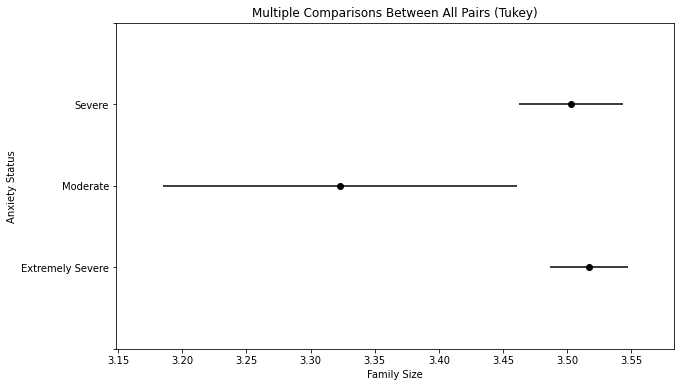

In [35]:
#post hoc
comp = mc.MultiComparison(df['familysize'], df['anxiety_status'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())
print("There is a statistically significant difference in family size between those who anxiety status are moderate and extremely severe, and anxiety status are moderate and severe, no other groups differed significantly. ")
print(post_hoc_res.plot_simultaneous(ylabel= "Anxiety Status", xlabel= "Family Size"))


In [36]:
#Anxiety and major
info = pd.crosstab(index=df['anxiety_status'], columns=df['major'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Anxiety and major are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Anxiety and major are independent of each other.'
  )

chi2 value:  11288.933113877549
p value:  2.9678577932970194e-06
dof value:  10616
Anxiety and major are NOT independent of each other. There are relationships between these categorical variables.


Stress

In [37]:
#Stress and education
info = pd.crosstab(index=df['stress_status'], columns=df['education'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Stress and Education are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Stress and Education are independent of each other.'
  )

chi2 value:  787.4402183418634
p value:  3.028185212777724e-157
dof value:  16
Stress and Education are NOT independent of each other. There are relationships between these categorical variables.


In [38]:
#Stress and urban
info = pd.crosstab(index=df['stress_status'], columns=df['urban'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Stress and Urban are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Stress and Urban are NOT independent of each other.'
  )

chi2 value:  56.85881534323863
p value:  8.381862450216685e-08
dof value:  12
Stress and Urban are NOT independent of each other. There are relationships between these categorical variables.


In [39]:
#Stress and gender
info = pd.crosstab(index=df['stress_status'], columns=df['gender'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Stress and gender are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Stress and gender are independent of each other.'
  )

chi2 value:  680.5018351714807
p value:  6.56340850137621e-138
dof value:  12
Stress and gender are NOT independent of each other. There are relationships between these categorical variables.


In [40]:
#Stress and engnat
info = pd.crosstab(index=df['stress_status'], columns=df['engnat'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Stress and engnat are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Stress and engnat are independent of each other.'
  )

chi2 value:  81.19393797905116
p value:  2.81033807500719e-14
dof value:  8
Stress and engnat are NOT independent of each other. There are relationships between these categorical variables.


In [41]:
#Stress and age
F,p = stats.f_oneway(df['age'][df['stress_status'] == 'Extremely Severe'],
               df['age'][df['stress_status'] == 'Severe'],
               df['age'][df['stress_status'] == 'Moderate'],
              df['age'][df['stress_status'] == 'Normal'],
              df['age'][df['stress_status'] == 'Mild'])

print('F :', F)
print('p value:', p)
if p < 0.05:
  print(
      'Stress and age has significant difference between the groups.'
  )
else:
    print(
      'Stress and age has NO significant difference between the groups.'
  )

F : 46.15321374223654
p value: 9.38658662789982e-39
Stress and age has significant difference between the groups.


      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
     group1       group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
Extremely Severe     Mild    4.269  0.001  2.8732  5.6648   True
Extremely Severe Moderate   3.2108  0.001  2.3616    4.06   True
Extremely Severe   Normal   7.1702  0.001  3.8158 10.5246   True
Extremely Severe   Severe   1.4303  0.001  0.7098  2.1508   True
            Mild Moderate  -1.0582 0.3272 -2.5924   0.476  False
            Mild   Normal   2.9012 0.1777 -0.6883  6.4907  False
            Mild   Severe  -2.8387  0.001 -4.3056 -1.3718   True
        Moderate   Normal   3.9594 0.0135  0.5451  7.3737   True
        Moderate   Severe  -1.7805  0.001 -2.7421 -0.8189   True
          Normal   Severe  -5.7399  0.001 -9.1245 -2.3553   True
----------------------------------------------------------------
There is a statistically significant difference in age between stress status of all groups

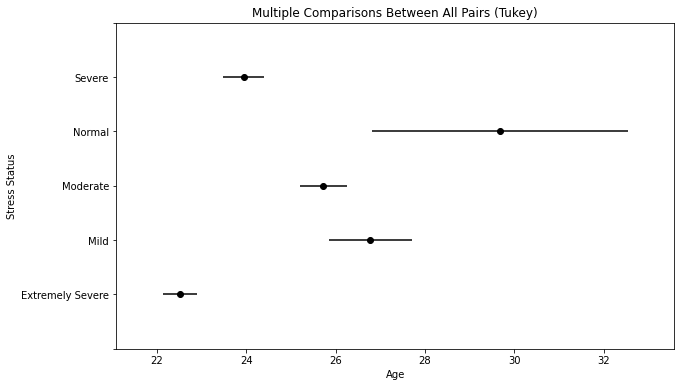

In [42]:
#post hoc
comp = mc.MultiComparison(df['age'], df['stress_status'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())
print("There is a statistically significant difference in age between stress status of all groups except stress level of mild and moderate, and stress level of mild and severe. ")
print(post_hoc_res.plot_simultaneous(ylabel= "Stress Status", xlabel= "Age"))
print("The age group around the age of 22 to 23 is the most severe for stress status.")

In [43]:
#Stress and screensize
info = pd.crosstab(index=df['stress_status'], columns=df['screensize'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Stress and screensize are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Stress and screensize are independent of each other.'
  )

chi2 value:  107.9114595483348
p value:  2.0292580215627902e-22
dof value:  4
Stress and screensize are NOT independent of each other. There are relationships between these categorical variables.


In [44]:
#Stress and uniquenetworklocation
info = pd.crosstab(index=df['stress_status'], columns=df['uniquenetworklocation'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Stress and uniquenetworklocation are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Stress and uniquenetworklocation are independent of each other.'
  )

chi2 value:  9.633402929575663
p value:  0.04707712228762675
dof value:  4
Stress and uniquenetworklocation are NOT independent of each other. There are relationships between these categorical variables.


In [45]:
#Stress and hand
info = pd.crosstab(index=df['stress_status'], columns=df['hand'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Stress and hand are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Stress and hand are independent of each other.'
  )

chi2 value:  61.4094285918622
p value:  1.2477818713848391e-08
dof value:  12
Stress and hand are NOT independent of each other. There are relationships between these categorical variables.


In [46]:
#Stress and religion
info = pd.crosstab(index=df['stress_status'], columns=df['religion'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Stress and religion are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Stress and religion are independent of each other.'
  )

chi2 value:  237.99089094451713
p value:  5.4684206397830144e-27
dof value:  48
Stress and religion are NOT independent of each other. There are relationships between these categorical variables.


In [47]:
#Stress and orientation
info = pd.crosstab(index=df['stress_status'], columns=df['orientation'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Stress and orientation are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Stress and orientation are independent of each other.'
  )

chi2 value:  496.1263223417723
p value:  1.882856348040941e-92
dof value:  20
Stress and orientation are NOT independent of each other. There are relationships between these categorical variables.


In [48]:
#Stress and race
info = pd.crosstab(index=df['stress_status'], columns=df['race'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Stress and race are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Stress and race are independent of each other'
  )

chi2 value:  107.09627524755741
p value:  1.806117719197219e-12
dof value:  24
Stress and race are NOT independent of each other. There are relationships between these categorical variables.


In [49]:
#Stress and voted
info = pd.crosstab(index=df['stress_status'], columns=df['voted'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Stress and voted are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Stress and voted are independent of each other.'
  )

chi2 value:  429.68321658212693
p value:  8.312991616276009e-88
dof value:  8
Stress and voted are NOT independent of each other. There are relationships between these categorical variables.


In [50]:
#Stress and married
info = pd.crosstab(index=df['stress_status'], columns=df['married'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Stress and married are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Stress and married are independent of each other.'
  )

chi2 value:  546.4813015321422
p value:  2.7837434950638835e-109
dof value:  12
Stress and married are NOT independent of each other. There are relationships between these categorical variables.


In [51]:
#Stress and family size
F,p = stats.f_oneway(df['familysize'][df['stress_status'] == 'Extremely Severe'],
               df['familysize'][df['stress_status'] == 'Severe'],
               df['familysize'][df['stress_status'] == 'Moderate'],
              df['familysize'][df['stress_status'] == 'Normal'],
              df['familysize'][df['stress_status'] == 'Mild'])

print('F :', F)
print('p value:', p)
if p < 0.05:
  print(
      'Stress and family size has significant difference between the groups.'
  )
else:
    print(
      'Stress and family size has NO significant difference between the groups.'
  )

F : 9.974520983256014
p value: 4.584939087825784e-08
Stress and family size has significant difference between the groups.


      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
     group1       group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
Extremely Severe     Mild    0.192 0.0015  0.0533  0.3308   True
Extremely Severe Moderate    0.165  0.001  0.0806  0.2494   True
Extremely Severe   Normal    0.179 0.5744 -0.1545  0.5124  False
Extremely Severe   Severe   0.0687 0.0677  -0.003  0.1403  False
            Mild Moderate   -0.027    0.9 -0.1795  0.1255  False
            Mild   Normal  -0.0131    0.9 -0.3699  0.3438  False
            Mild   Severe  -0.1234 0.1421 -0.2692  0.0224  False
        Moderate   Normal    0.014    0.9 -0.3254  0.3534  False
        Moderate   Severe  -0.0964 0.0471 -0.1919 -0.0008   True
          Normal   Severe  -0.1103 0.8977 -0.4468  0.2261  False
----------------------------------------------------------------
There is a statistically significant difference in family size between those who stress st

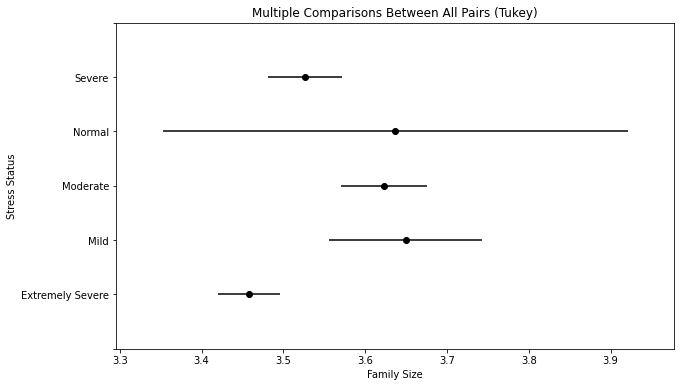

In [52]:
#post hoc
comp = mc.MultiComparison(df['familysize'], df['stress_status'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())
print("There is a statistically significant difference in family size between those who stress status are mild and extremely severe, stress status that are moderate and extremely severe, and stress status that are moderate and severe, no other groups differed significantly. ")
print(post_hoc_res.plot_simultaneous(ylabel= "Stress Status", xlabel= "Family Size"))


In [53]:
#Stress and major
info = pd.crosstab(index=df['stress_status'], columns=df['major'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Stress and major are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Stress and major are independent of each other.'
  )

chi2 value:  22141.965811294365
p value:  6.577121764052317e-06
dof value:  21232
Stress and major are NOT independent of each other. There are relationships between these categorical variables.


All the catergorical variables have relationship between each of the depression, stress and anxiety status except for hand and anxiety status. Wheareas for the numerical variables, both the age and family size have different means across different status of depression, stress and anxiety. 